## This is the 2-layer neural network workbook for ECE 239AS Assignment #3

Please follow the notebook linearly to implement a two layer neural network.

Please print out the workbook entirely when completed.

We thank Serena Yeung & Justin Johnson for permission to use code written for the CS 231n class (cs231n.stanford.edu).  These are the functions in the cs231n folders and code in the jupyer notebook to preprocess and show the images.  The classifiers used are based off of code prepared for CS 231n as well.

The goal of this workbook is to give you experience with training a two layer neural network.

In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

## Toy example

Before loading CIFAR-10, there will be a toy example to test your implementation of the forward and backward pass

In [2]:
from nndl.neural_net import TwoLayerNet

In [3]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

### Compute forward pass scores

In [7]:
## Implement the forward pass of the neural network.

# Note, there is a statement if y is None: return scores, which is why 
# the following call will calculate the scores.
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
    [-1.07260209,  0.05083871, -0.87253915],
    [-2.02778743, -0.10832494, -1.52641362],
    [-0.74225908,  0.15259725, -0.39578548],
    [-0.38172726,  0.10835902, -0.17328274],
    [-0.64417314, -0.18886813, -0.41106892]])
print(correct_scores)

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-1.07260209  0.05083871 -0.87253915]
 [-2.02778743 -0.10832494 -1.52641362]
 [-0.74225908  0.15259725 -0.39578548]
 [-0.38172726  0.10835902 -0.17328274]
 [-0.64417314 -0.18886813 -0.41106892]]

correct scores:
[[-1.07260209  0.05083871 -0.87253915]
 [-2.02778743 -0.10832494 -1.52641362]
 [-0.74225908  0.15259725 -0.39578548]
 [-0.38172726  0.10835902 -0.17328274]
 [-0.64417314 -0.18886813 -0.41106892]]
Difference between your scores and correct scores:
3.381231204052648e-08


### Forward pass loss

In [41]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.071696123862817

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
0.0


In [42]:
print(loss)

1.071696123862817


### Backward pass

Implements the backwards pass of the neural network.  Check your gradients with the gradient check utilities provided.

In [52]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('{} max relative error: {}'.format(param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.425472117244757e-10
b2 max relative error: 1.839165909006465e-10
W1 max relative error: 1.2832845443256344e-09
b1 max relative error: 3.1726804786908923e-09


### Training the network

Implement neural_net.train() to train the network via stochastic gradient descent, much like the softmax and SVM.

Final training loss:  0.014497864587766123


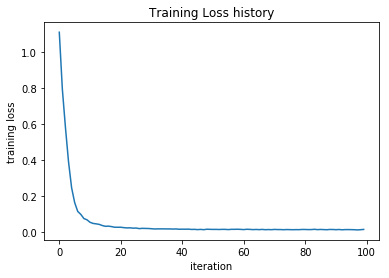

In [55]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

## Classify CIFAR-10

Do classification on the CIFAR-10 dataset.

In [96]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


### Running SGD

If your implementation is correct, you should see a validation accuracy of around 28-29%.

In [136]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

# Save this net as the variable subopt_net for later comparison.
subopt_net = net

iteration 0 / 1000: loss 2.302765438396687
iteration 100 / 1000: loss 2.3021193143010317
iteration 200 / 1000: loss 2.2961735786695296
iteration 300 / 1000: loss 2.244312606254473
iteration 400 / 1000: loss 2.127009816343376
iteration 500 / 1000: loss 2.122217566760532
iteration 600 / 1000: loss 2.041098633616805
iteration 700 / 1000: loss 2.009639010844623
iteration 800 / 1000: loss 1.9819702447535779
iteration 900 / 1000: loss 1.9657385387077975
Validation accuracy:  0.285


## Questions:

The training accuracy isn't great.  

(1) What are some of the reasons why this is the case?  Take the following cell to do some analyses and then report your answers in the cell following the one below.

(2) How should you fix the problems you identified in (1)?


In [121]:
stats['train_acc_history']

[0.08, 0.22, 0.25, 0.285, 0.32]

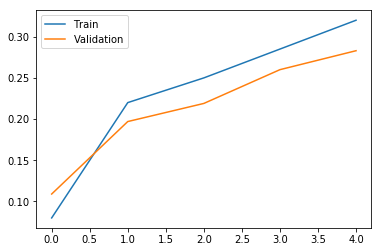

In [122]:
# ================================================================ #
# YOUR CODE HERE:
#   Do some debugging to gain some insight into why the optimization
#   isn't great.
# ================================================================ #

# Plot the loss function and train / validation accuracies
plt.plot(stats['train_acc_history'], label='Train')
plt.plot(stats['val_acc_history'], label='Validation')
plt.legend()

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #

Text(0.5,1,'loss function')

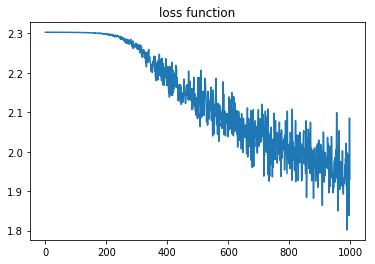

In [125]:
plt.plot(stats['loss_history'])
plt.title('loss function')

## Answers:

(1) First we increased the number of iterations as the trend is decreasing and we ran for just 1000 iterations. Increasing the number of iterations to 4000 from 1000 gave us 40.5% validation accuracy. As the loss is not reducing at a fast pace we can increase the learn rate keeping the number of iterations at 1000. Running the model for 1000 iterations at 5e-4 gave a validation accuracy of 46%. Combing both change in learning rate to 5e-4 and number of iterations to 4000 gave a validation accuracy of 49.6%. So small/low learning rate and running for a few iterations is reason for bad performance. 

(2) Now we will fix these issue by performing a grid search over learning rate, regularization strength and get the best performance. We tested for 5 random values sampled betwen 1e-4 and 1e-3 for learning rate and 5 random values sampled between 0.1 and 0.9 for regularization strength and the best model is reported. The number of iterations is fixed at 4000. 

## Optimize the neural network

Use the following part of the Jupyter notebook to optimize your hyperparameters on the validation set.  Store your nets as best_net.

In [129]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net2 = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net2.train(X_train, y_train, X_val, y_val,
            num_iters=4000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net2.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 4000: loss 2.3028175959819523
iteration 100 / 4000: loss 2.302290970371425
iteration 200 / 4000: loss 2.296272178035005
iteration 300 / 4000: loss 2.2703062789440804
iteration 400 / 4000: loss 2.181514367531708
iteration 500 / 4000: loss 2.0985581907639883
iteration 600 / 4000: loss 2.0596260913618067
iteration 700 / 4000: loss 2.0295564836543107
iteration 800 / 4000: loss 2.0001140031595006
iteration 900 / 4000: loss 1.9853612616109062
iteration 1000 / 4000: loss 2.0388313770574387
iteration 1100 / 4000: loss 1.9517769815987092
iteration 1200 / 4000: loss 1.9006543072046802
iteration 1300 / 4000: loss 1.936426695279824
iteration 1400 / 4000: loss 1.9279004938096964
iteration 1500 / 4000: loss 1.8202514767226092
iteration 1600 / 4000: loss 1.8379491035017719
iteration 1700 / 4000: loss 1.6943998915371932
iteration 1800 / 4000: loss 1.8042064521747807
iteration 1900 / 4000: loss 1.7866586554374664
iteration 2000 / 4000: loss 1.8015741718239346
iteration 2100 / 4000: loss 1

In [132]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net2 = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net2.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=5e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net2.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 1000: loss 2.3027918539151297
iteration 100 / 1000: loss 2.1010084866563323
iteration 200 / 1000: loss 1.914432377092557
iteration 300 / 1000: loss 1.8018627342955902
iteration 400 / 1000: loss 1.7955076230798688
iteration 500 / 1000: loss 1.6735875929481503
iteration 600 / 1000: loss 1.6147819563095482
iteration 700 / 1000: loss 1.6899393225781232
iteration 800 / 1000: loss 1.6582917883505583
iteration 900 / 1000: loss 1.5815746540261262
Validation accuracy:  0.46


In [131]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net2 = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net2.train(X_train, y_train, X_val, y_val,
            num_iters=4000, batch_size=200,
            learning_rate=5e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net2.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 4000: loss 2.302788749558609
iteration 100 / 4000: loss 2.1439021017670377
iteration 200 / 4000: loss 1.9359523247717838
iteration 300 / 4000: loss 1.8308087631392362
iteration 400 / 4000: loss 1.7561885410413016
iteration 500 / 4000: loss 1.6450473008000714
iteration 600 / 4000: loss 1.6338894269687216
iteration 700 / 4000: loss 1.6706619668080684
iteration 800 / 4000: loss 1.7491283581744248
iteration 900 / 4000: loss 1.6917724990163627
iteration 1000 / 4000: loss 1.5607941786160207
iteration 1100 / 4000: loss 1.48386861648847
iteration 1200 / 4000: loss 1.5998644710399166
iteration 1300 / 4000: loss 1.6193465792979103
iteration 1400 / 4000: loss 1.580969700779112
iteration 1500 / 4000: loss 1.5313270644270183
iteration 1600 / 4000: loss 1.5438345764328718
iteration 1700 / 4000: loss 1.5122028687088165
iteration 1800 / 4000: loss 1.4955951091695034
iteration 1900 / 4000: loss 1.4636016879944906
iteration 2000 / 4000: loss 1.4445691279412023
iteration 2100 / 4000: loss 1

In [155]:
best_net = None # store the best model into this 

# ================================================================ #
# YOUR CODE HERE:
#   Optimize over your hyperparameters to arrive at the best neural
#   network.  You should be able to get over 50% validation accuracy.
#   For this part of the notebook, we will give credit based on the
#   accuracy you get.  Your score on this question will be multiplied by:
#      min(floor((X - 28%)) / %22, 1) 
#   where if you get 50% or higher validation accuracy, you get full
#   points.
#
#   Note, you need to use the same network structure (keep hidden_size = 50)!
# ================================================================ #


best_accuracy = 0
best_lr = None
best_reg = None

lr_list = 10**(np.random.rand(5)-4)
reg_list = 0.1+0.8*np.random.rand(5)

for lr in lr_list:
    for reg in reg_list:        
        net3 = TwoLayerNet(input_size, hidden_size, num_classes)
        # Train the network
        stats = net3.train(X_train, y_train, X_val, y_val,
                    num_iters=4000, batch_size=200,
                    learning_rate=lr, learning_rate_decay=0.95,
                    reg=reg, verbose=True)
        # Predict on the validation set
        print('lr: ' + str(lr) + ' reg: ' + str(reg))        
        val_acc = (net3.predict(X_val) == y_val).mean()
        if best_accuracy < val_acc:
            best_accuracy = val_acc
            best_lr = lr
            best_reg = reg
            best_net = net3
        print('Validation accuracy: ', val_acc)

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #

iteration 0 / 4000: loss 2.3031976320386036
iteration 100 / 4000: loss 1.9544712220627072
iteration 200 / 4000: loss 1.8043351508660361
iteration 300 / 4000: loss 1.7171503786091844
iteration 400 / 4000: loss 1.8012096412665703
iteration 500 / 4000: loss 1.7379623529099866
iteration 600 / 4000: loss 1.5437126311727098
iteration 700 / 4000: loss 1.54317173246457
iteration 800 / 4000: loss 1.564701694914884
iteration 900 / 4000: loss 1.4823085326980725
iteration 1000 / 4000: loss 1.5873913814176352
iteration 1100 / 4000: loss 1.576423587293743
iteration 1200 / 4000: loss 1.5866432895921259
iteration 1300 / 4000: loss 1.5827833831750047
iteration 1400 / 4000: loss 1.4441865607643798
iteration 1500 / 4000: loss 1.473048825799501
iteration 1600 / 4000: loss 1.5020222053461056
iteration 1700 / 4000: loss 1.5251032245508331
iteration 1800 / 4000: loss 1.4472290687271594
iteration 1900 / 4000: loss 1.5864681134142429
iteration 2000 / 4000: loss 1.3891584053612758
iteration 2100 / 4000: loss 1.

iteration 1000 / 4000: loss 1.4494193481413764
iteration 1100 / 4000: loss 1.5347184100247322
iteration 1200 / 4000: loss 1.465867756544652
iteration 1300 / 4000: loss 1.543810157343861
iteration 1400 / 4000: loss 1.5883132339528205
iteration 1500 / 4000: loss 1.567408274576187
iteration 1600 / 4000: loss 1.39080961096135
iteration 1700 / 4000: loss 1.588980588075329
iteration 1800 / 4000: loss 1.5886903713648737
iteration 1900 / 4000: loss 1.4776382641987698
iteration 2000 / 4000: loss 1.5043783304306328
iteration 2100 / 4000: loss 1.5237837260801015
iteration 2200 / 4000: loss 1.4658956696369563
iteration 2300 / 4000: loss 1.5636961226737534
iteration 2400 / 4000: loss 1.4166619664393554
iteration 2500 / 4000: loss 1.615506278525518
iteration 2600 / 4000: loss 1.5257346822035738
iteration 2700 / 4000: loss 1.360747196713985
iteration 2800 / 4000: loss 1.4561525847892856
iteration 2900 / 4000: loss 1.4592428066523047
iteration 3000 / 4000: loss 1.4348737033066334
iteration 3100 / 4000

iteration 2000 / 4000: loss 1.664031444389417
iteration 2100 / 4000: loss 1.5324680836964677
iteration 2200 / 4000: loss 1.6889864144863482
iteration 2300 / 4000: loss 1.5821429737446129
iteration 2400 / 4000: loss 1.5374855376258298
iteration 2500 / 4000: loss 1.489547738619936
iteration 2600 / 4000: loss 1.6766742586276226
iteration 2700 / 4000: loss 1.615658783906776
iteration 2800 / 4000: loss 1.4596076510139528
iteration 2900 / 4000: loss 1.5822644628351892
iteration 3000 / 4000: loss 1.5595019189693862
iteration 3100 / 4000: loss 1.5208367190761145
iteration 3200 / 4000: loss 1.7116843759040052
iteration 3300 / 4000: loss 1.4942953770132796
iteration 3400 / 4000: loss 1.448565825577408
iteration 3500 / 4000: loss 1.4786543985645468
iteration 3600 / 4000: loss 1.4929681983996268
iteration 3700 / 4000: loss 1.4053679006651854
iteration 3800 / 4000: loss 1.5439832852398294
iteration 3900 / 4000: loss 1.4757876244974781
lr: 0.00032426094447496367 reg: 0.8080832902348538
Validation ac

iteration 3000 / 4000: loss 1.6971548675681027
iteration 3100 / 4000: loss 1.7694437021742708
iteration 3200 / 4000: loss 1.7330887499693326
iteration 3300 / 4000: loss 1.7269641664129722
iteration 3400 / 4000: loss 1.6941278766834882
iteration 3500 / 4000: loss 1.7489659087134524
iteration 3600 / 4000: loss 1.7367835918259948
iteration 3700 / 4000: loss 1.6944104485742038
iteration 3800 / 4000: loss 1.7044653437024797
iteration 3900 / 4000: loss 1.678298670784436
lr: 0.00011308762630396473 reg: 0.5672523048975602
Validation accuracy:  0.424
iteration 0 / 4000: loss 2.303220142593155
iteration 100 / 4000: loss 2.302619213805653
iteration 200 / 4000: loss 2.2923044781442563
iteration 300 / 4000: loss 2.2322489994604293
iteration 400 / 4000: loss 2.1698746561375786
iteration 500 / 4000: loss 2.1134615417289266
iteration 600 / 4000: loss 2.0673663169148773
iteration 700 / 4000: loss 2.0245466061202095
iteration 800 / 4000: loss 1.9648077139401767
iteration 900 / 4000: loss 2.0404186461985

lr: 0.0008877523738957979 reg: 0.28472709650470773
Validation accuracy:  0.513
iteration 0 / 4000: loss 2.3030201677534348
iteration 100 / 4000: loss 1.95417058207343
iteration 200 / 4000: loss 1.722111919029881
iteration 300 / 4000: loss 1.7051792988302226
iteration 400 / 4000: loss 1.8300002461427431
iteration 500 / 4000: loss 1.6491086038209604
iteration 600 / 4000: loss 1.5426112088770105
iteration 700 / 4000: loss 1.6407380421816717
iteration 800 / 4000: loss 1.3709569920456461
iteration 900 / 4000: loss 1.4849607957615807
iteration 1000 / 4000: loss 1.454149046731383
iteration 1100 / 4000: loss 1.5068258747690177
iteration 1200 / 4000: loss 1.5077640932342184
iteration 1300 / 4000: loss 1.482204449451628
iteration 1400 / 4000: loss 1.549838585669569
iteration 1500 / 4000: loss 1.5438393277743585
iteration 1600 / 4000: loss 1.5828775171857783
iteration 1700 / 4000: loss 1.5933829548684235
iteration 1800 / 4000: loss 1.3915081298406573
iteration 1900 / 4000: loss 1.429538705990823


iteration 900 / 4000: loss 1.5660137702960915
iteration 1000 / 4000: loss 1.6130986702420558
iteration 1100 / 4000: loss 1.506711518818459
iteration 1200 / 4000: loss 1.452837427375057
iteration 1300 / 4000: loss 1.574996256563916
iteration 1400 / 4000: loss 1.532668423398274
iteration 1500 / 4000: loss 1.5559945607848145
iteration 1600 / 4000: loss 1.4628221258838674
iteration 1700 / 4000: loss 1.4854572664350965
iteration 1800 / 4000: loss 1.5454522258316774
iteration 1900 / 4000: loss 1.471179975556544
iteration 2000 / 4000: loss 1.6967732837503606
iteration 2100 / 4000: loss 1.445544823451856
iteration 2200 / 4000: loss 1.3833512671107309
iteration 2300 / 4000: loss 1.506909733381828
iteration 2400 / 4000: loss 1.2445872012722785
iteration 2500 / 4000: loss 1.3746237482905022
iteration 2600 / 4000: loss 1.3757425556298
iteration 2700 / 4000: loss 1.376505471598503
iteration 2800 / 4000: loss 1.3403428020338883
iteration 2900 / 4000: loss 1.314103350200923
iteration 3000 / 4000: los

In [156]:
best_accuracy, best_lr, best_reg

(0.544, 0.0008877523738957979, 0.8080832902348538)

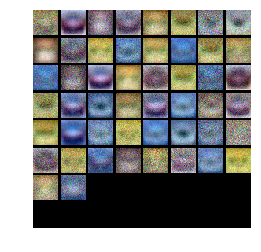

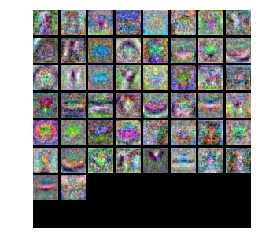

In [157]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.T.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(subopt_net)
show_net_weights(best_net)

## Question:

(1) What differences do you see in the weights between the suboptimal net and the best net you arrived at?

## Answer:

(1) The suboptimal weights have extracted a lot of colour information and contains mostly front sided cars as its weights, But the optimal weights have features from all the classes and is more noisy.

## Evaluate on test set 

In [158]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.513
